In [1]:
import cv2
import matplotlib.pyplot as plt


## Load Image

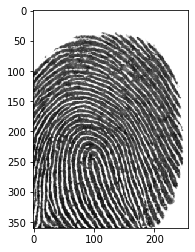

In [2]:
pic = cv2.imread('./pic/1.bmp')
plt.imshow(pic)

## Image Thinning

In [3]:
class FingerprintProcessor():
    def __init__(self, pic):
        # change to grayscale
        if pic.shape[2] == 3:
            pic = cv2.cvtColor(pic, cv2.COLOR_BGR2GRAY)
        pic = cv2.equalizeHist(pic)
        self.pic = pic
    
    def preprocess(self):
        ret, self.pic = cv2.threshold(self.pic, 110, 255, cv2.THRESH_BINARY_INV)
        # self.thinning()
        self.pic = cv2.ximgproc.thinning(self.pic, cv2.ximgproc.THINNING_GUOHALL)
        rect = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2))
        self.pic = cv2.dilate(self.pic, rect, iterations = 1)
        
    def thinning(self):
        rect = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
        self.pic = cv2.morphologyEx(self.pic, cv2.MORPH_OPEN, rect)
        rect = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2))
        self.pic = cv2.erode(self.pic, rect, iterations = 1)

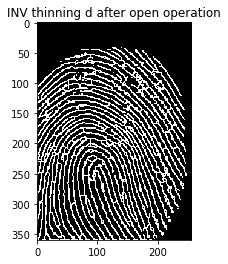

In [5]:
temp = FingerprintProcessor(pic)
temp.preprocess()
plt.title('INV thinning d after open operation')
plt.imshow(temp.pic, cmap='gray')